In [5]:
%matplotlib inline

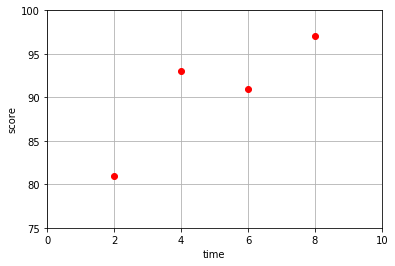

In [6]:
import matplotlib.pyplot as plt

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

plt.plot(x, y, 'ro')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 100)
plt.xlim(0, 10)
plt.show()

In [7]:
# 최소제곱법 계산
def compute_a(x, mx, y, my):
    d = 0

    for i in range(len(x)):
        d += (x[i] - mx)*(y[i] - my)

    divisor = sum([(i - mx)**2 for i in x])

    a_temp = d / divisor

    return a_temp

In [8]:
mx = np.mean(x)
my = np.mean(y)

In [9]:
a = compute_a(x, mx, y, my)
b = my - (mx * a)

y1 = [a * i + b for i in x]

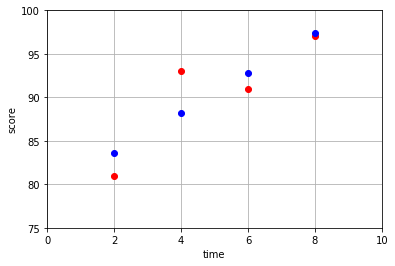

In [10]:
plt.plot(x, y, 'ro')
plt.plot(x, y1, 'bo')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 100)
plt.xlim(0, 10)
plt.show()

## 제소 제곱근 오차 (MSE)

### a 값에 따른 오차 변화

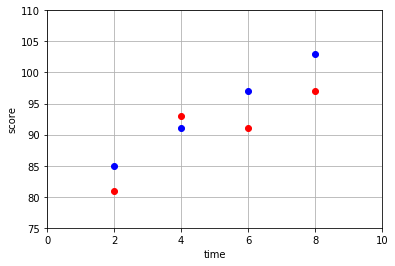

In [11]:
a = 3.0
b = 79

y1 = [a * i + b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, y1, 'bo')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 110)
plt.xlim(0, 10)
plt.show()

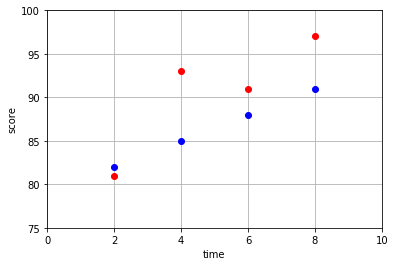

In [12]:
a = 1.5
b = 79

y1 = [a * i + b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, y1, 'bo')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 100)
plt.xlim(0, 10)
plt.show()

In [15]:
# 최소제곱근 오차 계산
def mse(p, y):
  temp = 0
  for i in range(len(y)):
    temp += ((p[i] - y[i]) ** 2)
    
    return np.sqrt(temp / len(y))

In [16]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

mx = np.mean(x)
my = np.mean(y)

a = compute_a(x, mx, y, my)
b = my - (mx * a)

y1 = [a * i + b for i in x]

print("오차값 : ", mse(y1, y))

오차값 :  1.2999999999999972


# 경사하강법~

In [17]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

# Tensorflow에서 사용하기 위한 변수 설정
# tf.random_uniform([1]) : 정규분포 난수 1 (1행 1열)개를 생성 (균등분포)
# 기울기 a (0-10사이 실수값)와 절편 b (0-100 사이 실수값)의 값을 임의로 정함
# seed = 0 : 항상 동일한 데이터를 뽑도록 설정
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y1 = a * x + b

# tf.sqrt() : 제곱근 함수
# tf.reduce_mean() : 평균 계산 함수
# tf.square() : 제곱 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y1 - y)))

learning_rate = 0.1

# tf.train : 경사 하강 알고리즘을 train 텐서에 연결
# GradientDescentOptimizer() : 미분을 사용하여 최저 비용을 향해 학습률만큼 진행하도록 하는 함수
# minimize(rmse) : rmse가 최소가 되는 값 검색 (최소 비용 함수) – 경사 하강
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse) 

NameError: name 'tf' is not defined